In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing/bank-additional-names.txt
/kaggle/input/bank-marketing/bank-additional-full.csv


In [21]:
#import the necessery packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('../input/bank-marketing/bank-additional-full.csv', sep = ';')

In [4]:
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<AxesSubplot:xlabel='y', ylabel='count'>

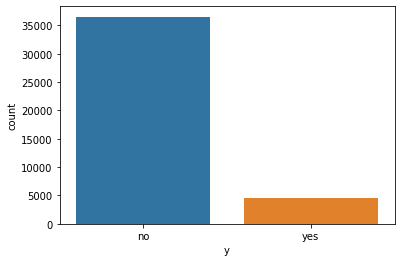

In [7]:
sns.countplot(x='y', data=df)

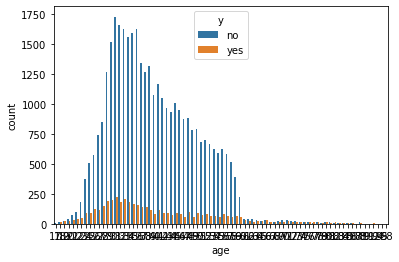

In [8]:
sns.countplot(x="age", data=df, hue="y");

<AxesSubplot:xlabel='age', ylabel='Count'>

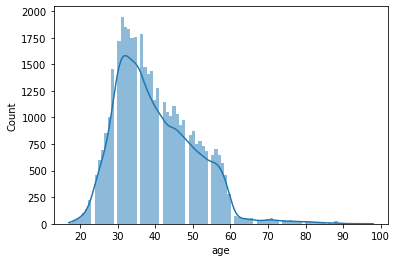

In [9]:
sns.histplot(df['age'], kde=True, linewidth=0)

<AxesSubplot:xlabel='age', ylabel='Density'>

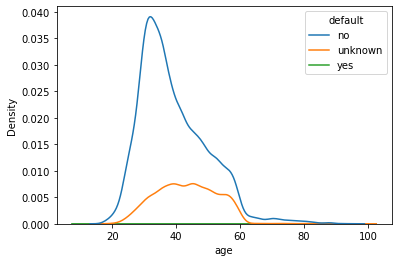

In [10]:
sns.kdeplot(data=df, x="age", hue="default")

<AxesSubplot:xlabel='age', ylabel='Density'>

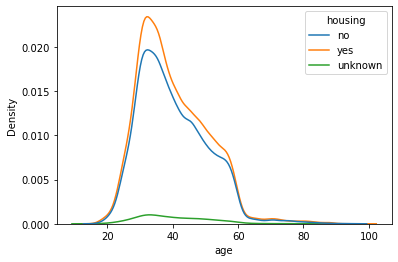

In [11]:
sns.kdeplot(data=df, x="age", hue="housing")

<AxesSubplot:xlabel='age', ylabel='Density'>

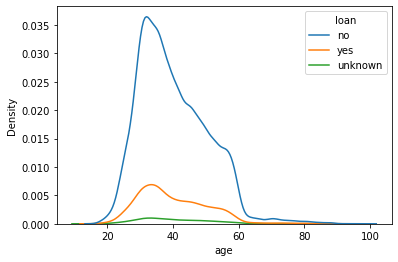

In [12]:
sns.kdeplot(data=df, x="age", hue="loan")

In [13]:
X=df.drop(['y'],axis=1)
X=pd.get_dummies(X)

y=df['y']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)



In [16]:
def report(model):
    preds = model.predict(scaled_X_test)
    print(classification_report(y_test, preds))
    plot_confusion_matrix(model, X_test, y_test)

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     10978
         yes       0.68      0.34      0.45      1379

    accuracy                           0.91     12357
   macro avg       0.80      0.66      0.70     12357
weighted avg       0.89      0.91      0.89     12357



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


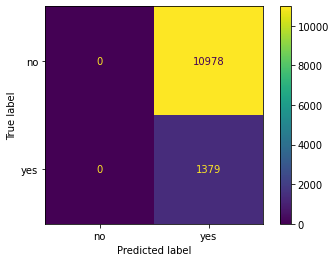

In [17]:
svc_linear=SVC(kernel='linear')
svc_linear.fit(scaled_X_train, y_train)
report(svc_linear)

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     10978
         yes       0.64      0.34      0.45      1379

    accuracy                           0.91     12357
   macro avg       0.78      0.66      0.70     12357
weighted avg       0.89      0.91      0.89     12357



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


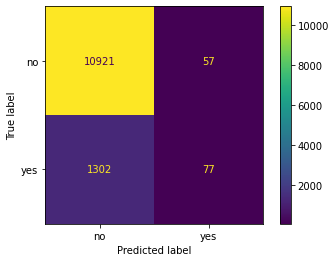

In [18]:
svc_poly=SVC(kernel='poly')
svc_poly.fit(scaled_X_train, y_train)
report(svc_poly)

              precision    recall  f1-score   support

          no       0.93      0.97      0.95     10978
         yes       0.64      0.39      0.48      1379

    accuracy                           0.91     12357
   macro avg       0.78      0.68      0.72     12357
weighted avg       0.89      0.91      0.90     12357



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


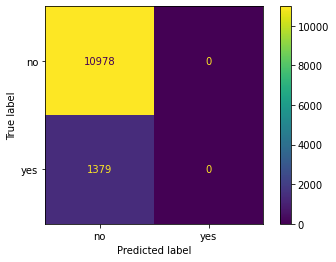

In [19]:
svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(scaled_X_train, y_train)
report(svc_rbf)

              precision    recall  f1-score   support

          no       0.93      0.93      0.93     10978
         yes       0.46      0.44      0.45      1379

    accuracy                           0.88     12357
   macro avg       0.70      0.69      0.69     12357
weighted avg       0.88      0.88      0.88     12357



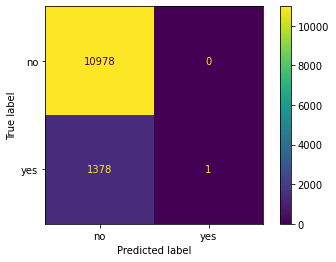

In [25]:
svc_rbf=SVC(kernel='sigmoid')
svc_rbf.fit(scaled_X_train, y_train)
report(svc_rbf)

In [22]:
models={
        'LR':LogisticRegression(),
        'KNN':KNeighborsClassifier(),
        'DT':DecisionTreeClassifier(),
        'NB':GaussianNB(),
        'RF':RandomForestClassifier()
        }

In [23]:
scores = {}

In [24]:
for i, model in models.items():
    print("model: ", model)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test , y_pred))
    print("-" * 50)
    scores[i] = model.score(X_test,y_test)

model:  LogisticRegression()
              precision    recall  f1-score   support

          no       0.93      0.97      0.95     10978
         yes       0.66      0.40      0.50      1379

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357

--------------------------------------------------
model:  KNeighborsClassifier()
              precision    recall  f1-score   support

          no       0.94      0.96      0.95     10978
         yes       0.59      0.48      0.53      1379

    accuracy                           0.90     12357
   macro avg       0.76      0.72      0.74     12357
weighted avg       0.90      0.90      0.90     12357

--------------------------------------------------
model:  DecisionTreeClassifier()
              precision    recall  f1-score   support

          no       0.94      0.93      0.94     10978
         yes       0.50      0.55      0.5